In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [27]:
doctors = pd.read_csv('/content/doctors_with_avg_price.csv',encoding='utf-8')

In [28]:
del doctors['Unnamed: 0']

In [46]:
doctors[doctors['rating_prod']==0]['rating_prod'].value_counts()

,count
rating_prod,
0.0,1886


In [29]:
doctors_reviews = pd.read_csv('https://github.com/yyaroslavskiy/cuddly-chainsaw/raw/refs/heads/develop/eda/merge/doctors_review.csv')

In [30]:
del doctors_reviews['Unnamed: 0']

In [31]:
unique_addresses_with_coords = pd.read_csv('/content/unique_addresses_with_coords.csv')

In [3]:
mean_review_rate = pd.read_csv('/content/mean_review_rate.csv')

In [4]:
mean_review_rate

,doctor_link,rate,source
0,https://docdoc.ru/doctor/ALEKSANDROVA_LYuDMILA_5,4.850000,sber
1,https://docdoc.ru/doctor/ARISTARHOVA_NADEZhDA,5.000000,sber
2,https://docdoc.ru/doctor/ASTAPOVICh_NATALYa_2,5.000000,sber
3,https://docdoc.ru/doctor/Aakef_Hayder,5.000000,sber
4,https://docdoc.ru/doctor/Abacheva_Maida,5.000000,sber
...,...,...,...
33155,https://prodoctorov.ru/moskva/vrach/999665-saa...,4.933333,prodoctorov
33156,https://prodoctorov.ru/moskva/vrach/999727-ved...,5.000000,prodoctorov
33157,https://prodoctorov.ru/moskva/vrach/999733-dzh...,5.000000,prodoctorov
33158,https://prodoctorov.ru/moskva/vrach/999782-fed...,5.000000,prodoctorov


In [33]:
address_records = []

#проходимся по адресам сбера для каждого врача чтобы собрать детальную инфу по каждому адресу
for i in [1, 2, 3]:
    sber_mask = doctors[f'clinic_{i}_address_sber'].notna()
    for idx, row in doctors[sber_mask].iterrows():
        address_records.append({
            'address': row[f'clinic_{i}_address_sber'],
            'source': 'sber',
            'doctor_name': row['name'],
            'doctor_link' : row['link_sber'],
            'rating': row['rating_sber'],
            'price_source': row['price_sber'],
            'price_avg': row['price'],
            'experience': row['experience'],
            'metro' : row[f'clinic_{i}_metro_sber'],
            'speciality' : row['speciality'],
            'is_kids' : row['is_kids'],
            'is_adults' : row['is_adults'],
            'latitude': unique_addresses_with_coords[unique_addresses_with_coords['address'] == row[f'clinic_{i}_address_sber']]['latitude'],
            'longitude': unique_addresses_with_coords[unique_addresses_with_coords['address'] == row[f'clinic_{i}_address_sber']]['longitude'],
            'review_rating': mean_review_rate[[mean_review_rate['doctor_link']==row['link_sber']]['rate']]
        })


#проходимся по адресам продокторов для каждого врача
for i in [1, 2, 3]:
    prod_mask = doctors[f'clinic_{i}_address_prod'].notna()
    for idx, row in doctors[prod_mask].iterrows():
        address_records.append({
            'address': row[f'clinic_{i}_address_prod'],
            'source': 'prod',
            'doctor_name': row['name'],
            'doctor_link' : row['link_prod'],
            'rating': row['rating_prod'],
            'price_source': row['price_prod'],
            'price_avg': row['price'],
            'experience': row['experience'],
            'metro' : row[f'clinic_{i}_metro_prod'],
            'speciality' : row['speciality'],
            'is_kids' : row['is_kids'],
            'is_adults' : row['is_adults'],
            'latitude': unique_addresses_with_coords[unique_addresses_with_coords['address'] == row[f'clinic_{i}_address_prod']]['latitude'],
            'longitude': unique_addresses_with_coords[unique_addresses_with_coords['address'] == row[f'clinic_{i}_address_prod']]['longitude'],
            'review_rating': mean_review_rate[[mean_review_rate['doctor_link']==row['link_prod']]['rate']]
        })

#переводим массив словарей в датафрейм
data_coords = pd.DataFrame(address_records)

In [34]:
data_coords['latitude'] = data_coords['latitude'].astype(str).str.extract('(\d+\.\d+)')[0].astype(float)
data_coords['longitude'] = data_coords['longitude'].astype(str).str.extract('(\d+\.\d+)')[0].astype(float)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-449966311.py:1: SyntaxWarning: invalid escape sequence '\d'
  data_coords['latitude'] = data_coords['latitude'].astype(str).str.extract('(\d+\.\d+)')[0].astype(float)
/tmp/ipython-input-449966311.py:2: SyntaxWarning: invalid escape sequence '\d'
  data_coords['longitude'] = data_coords['longitude'].astype(str).str.extract('(\d+\.\d+)')[0].astype(float)


In [ ]:
data_coords.to_csv('data_coords.csv')

In [35]:
data_coords

,address,source,doctor_name,doctor_link,rating,price_source,price_avg,experience,metro,speciality,is_kids,is_adults,latitude,longitude
0,"г. Москва, ул. Рязанский пр-т, д. 2Б",sber,Агеева Наталья Юрьевна,https://docdoc.ru/doctor/Ageeva_Natalya_12,4.5,3500.0,NaN,18.0,Нижегородская,NaN,False,True,55.730487,37.738656
1,"г. Москва, ул. Щукинская, д. 2",sber,Алексеева Екатерина Михайловна,https://docdoc.ru/doctor/Alekseeva_Ekaterina_36,4.3,5000.0,NaN,11.0,Щукинская,NaN,False,True,55.809641,37.481936
2,"г. Москва, Последний пер., д. 28",sber,Антипова Анна Дмитриевна,https://docdoc.ru/doctor/Antipova_Anna_12,4.3,5500.0,NaN,4.0,Сухаревская,невролог,False,True,55.769681,37.630625
3,"г. Москва, ул. Нагорная, д. 17, корп. 6",sber,Аранович Элина Викторовна,https://docdoc.ru/doctor/Elina_Viktorovna,4.4,6900.0,NaN,23.0,Нагорная,NaN,False,True,55.677524,37.607709
4,"г. Тверь, ул. Крылова, д. 21",sber,Барбашинова Юлия Владимировна,https://docdoc.ru/doctor/Barbashinova_Yuliya,4.3,15000.0,NaN,25.0,NaN,NaN,True,True,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42307,"Котельники, ул. Кузьминская, д. 7Б",prod,Ярусова Инна Викторовна,https://prodoctorov.ru/moskva/vrach/316879-yar...,NaN,NaN,NaN,33.0,Котельники,терапевт,False,True,55.665274,37.867529
42308,"ул. Энгельса, д. 7/21",prod,Ярцева Ирина Михайловна,https://prodoctorov.ru/moskva/vrach/289003-yar...,NaN,10000.0,10000.0,19.0,Бауманская,"терапевт, аллерголог",False,True,NaN,NaN
42309,"Реутов, Юбилейный просп., д. 80",prod,Ясинская Светлана Борисовна,https://prodoctorov.ru/moskva/vrach/865955-yas...,NaN,NaN,NaN,27.0,Новокосино,эндокринолог,False,True,55.753068,37.887884
42310,"Махачкала, ул. Ахульго, д. 8",prod,Яхьяева Байсари Исаковна,https://prodoctorov.ru/moskva/vrach/997474-yah...,1.9,1120.0,1560.0,32.0,NaN,гинеколог,False,True,NaN,NaN


In [36]:
data_coords.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42312 entries, 0 to 42311
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   address       42312 non-null  object 
 1   source        42312 non-null  object 
 2   doctor_name   42312 non-null  object 
 3   doctor_link   42312 non-null  object 
 4   rating        31832 non-null  float64
 5   price_source  15720 non-null  float64
 6   price_avg     8768 non-null   float64
 7   experience    28416 non-null  float64
 8   metro         39722 non-null  object 
 9   speciality    41321 non-null  object 
 10  is_kids       42312 non-null  bool   
 11  is_adults     42312 non-null  bool   
 12  latitude      39669 non-null  float64
 13  longitude     39669 non-null  float64
dtypes: bool(2), float64(6), object(6)
memory usage: 4.0+ MB


In [37]:
data_coords.describe()

,rating,price_source,price_avg,experience,latitude,longitude
count,31832.000000,15720.000000,8768.000000,28416.000000,39669.000000,39669.000000
mean,2.973071,4740.573664,4828.329323,21.496340,55.738058,37.590122
std,1.593533,3798.333502,3399.139926,12.225403,0.086143,0.139437
min,0.000000,500.000000,1360.000000,1.000000,55.099778,36.461908
25%,1.800000,2900.000000,2940.000000,11.000000,55.685046,37.510448
50%,3.200000,3500.000000,3700.000000,20.000000,55.744520,37.593075
75%,4.400000,5500.000000,5400.000000,30.000000,55.786920,37.659299
max,5.000000,150000.000000,34239.500000,71.000000,56.296939,38.275454


In [50]:
data_coords.drop_duplicates()

,address,source,doctor_name,doctor_link,rating,price_source,price_avg,experience,metro,speciality,is_kids,is_adults,latitude,longitude
0,"г. Москва, ул. Рязанский пр-т, д. 2Б",sber,Агеева Наталья Юрьевна,https://docdoc.ru/doctor/Ageeva_Natalya_12,4.5,3500.0,NaN,18.0,Нижегородская,NaN,False,True,55.730487,37.738656
1,"г. Москва, ул. Щукинская, д. 2",sber,Алексеева Екатерина Михайловна,https://docdoc.ru/doctor/Alekseeva_Ekaterina_36,4.3,5000.0,NaN,11.0,Щукинская,NaN,False,True,55.809641,37.481936
2,"г. Москва, Последний пер., д. 28",sber,Антипова Анна Дмитриевна,https://docdoc.ru/doctor/Antipova_Anna_12,4.3,5500.0,NaN,4.0,Сухаревская,невролог,False,True,55.769681,37.630625
3,"г. Москва, ул. Нагорная, д. 17, корп. 6",sber,Аранович Элина Викторовна,https://docdoc.ru/doctor/Elina_Viktorovna,4.4,6900.0,NaN,23.0,Нагорная,NaN,False,True,55.677524,37.607709
4,"г. Тверь, ул. Крылова, д. 21",sber,Барбашинова Юлия Владимировна,https://docdoc.ru/doctor/Barbashinova_Yuliya,4.3,15000.0,NaN,25.0,NaN,NaN,True,True,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42307,"Котельники, ул. Кузьминская, д. 7Б",prod,Ярусова Инна Викторовна,https://prodoctorov.ru/moskva/vrach/316879-yar...,NaN,NaN,NaN,33.0,Котельники,терапевт,False,True,55.665274,37.867529
42308,"ул. Энгельса, д. 7/21",prod,Ярцева Ирина Михайловна,https://prodoctorov.ru/moskva/vrach/289003-yar...,NaN,10000.0,10000.0,19.0,Бауманская,"терапевт, аллерголог",False,True,NaN,NaN
42309,"Реутов, Юбилейный просп., д. 80",prod,Ясинская Светлана Борисовна,https://prodoctorov.ru/moskva/vrach/865955-yas...,NaN,NaN,NaN,27.0,Новокосино,эндокринолог,False,True,55.753068,37.887884
42310,"Махачкала, ул. Ахульго, д. 8",prod,Яхьяева Байсари Исаковна,https://prodoctorov.ru/moskva/vrach/997474-yah...,1.9,1120.0,1560.0,32.0,NaN,гинеколог,False,True,NaN,NaN


## Карты

### Предобработка

In [52]:
data_coords['price_final'] = data_coords['price_avg'].fillna(data_coords['price_source'])
data_coords = data_coords.dropna(subset=['latitude', 'longitude'])

### Базовая карта

In [53]:
sns.set(style='whitegrid')

Выставим границы для координат, чтобы получить только московские адреса


In [61]:
data_moskow = data_coords[(data_coords['latitude']<55.931762) & (data_coords['latitude']>55.545493) & (data_coords['longitude']>37.344287) & (data_coords['longitude']<37.879998)]

/tmp/ipython-input-3897693309.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(data_moskow['longitude'], data_moskow['latitude'], 'ro', label='Клиники', alpha=0.1, color='maroon', markersize=5)


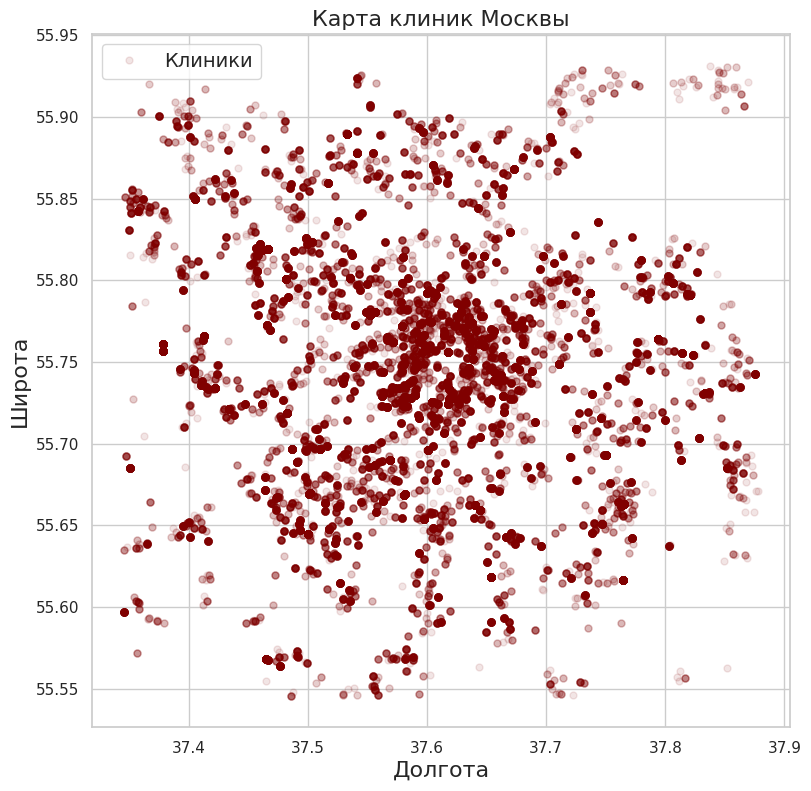

In [69]:
plt.figure(figsize=(9, 9))

plt.plot(data_moskow['longitude'], data_moskow['latitude'], 'ro', label='Клиники', alpha=0.1, color='maroon', markersize=5)

plt.xlabel('Долгота', fontsize=16)
plt.ylabel('Широта', fontsize=16)
plt.title('Карта клиник Москвы', fontsize=16)
plt.legend(fontsize=14, frameon=True)

# скачать изображение с прозрачным фоном
# plt.savefig('card_base.png', transparent=True)
plt.show()

границы москвы с сопоставлением с реальной картой

In [ ]:
data_moskow[(data_moskow['latitude']<55.58)&(data_moskow['longitude']<37.4)|(data_moskow['latitude']>55.92)&(data_moskow['longitude']>37.86)]

С цветовыми точками, в зависимости от рейтинга

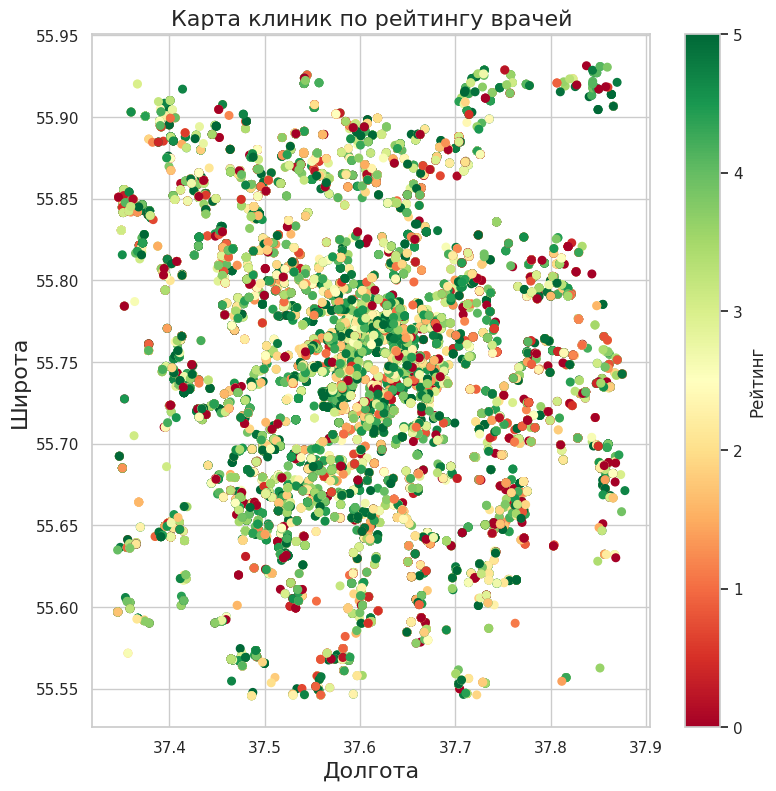

In [79]:
plt.figure(figsize=(9, 9))

scatter = plt.scatter(data_moskow['longitude'], data_moskow['latitude'], c=data_moskow['rating'], cmap='RdYlGn', alpha=1, s=30, )

plt.xlabel('Долгота', fontsize=16)
plt.ylabel('Широта', fontsize=16)
plt.title('Карта клиник по рейтингу врачей', fontsize=16)
plt.colorbar(scatter, label='Рейтинг')

plt.show()

Всего записей с координатами: 39669


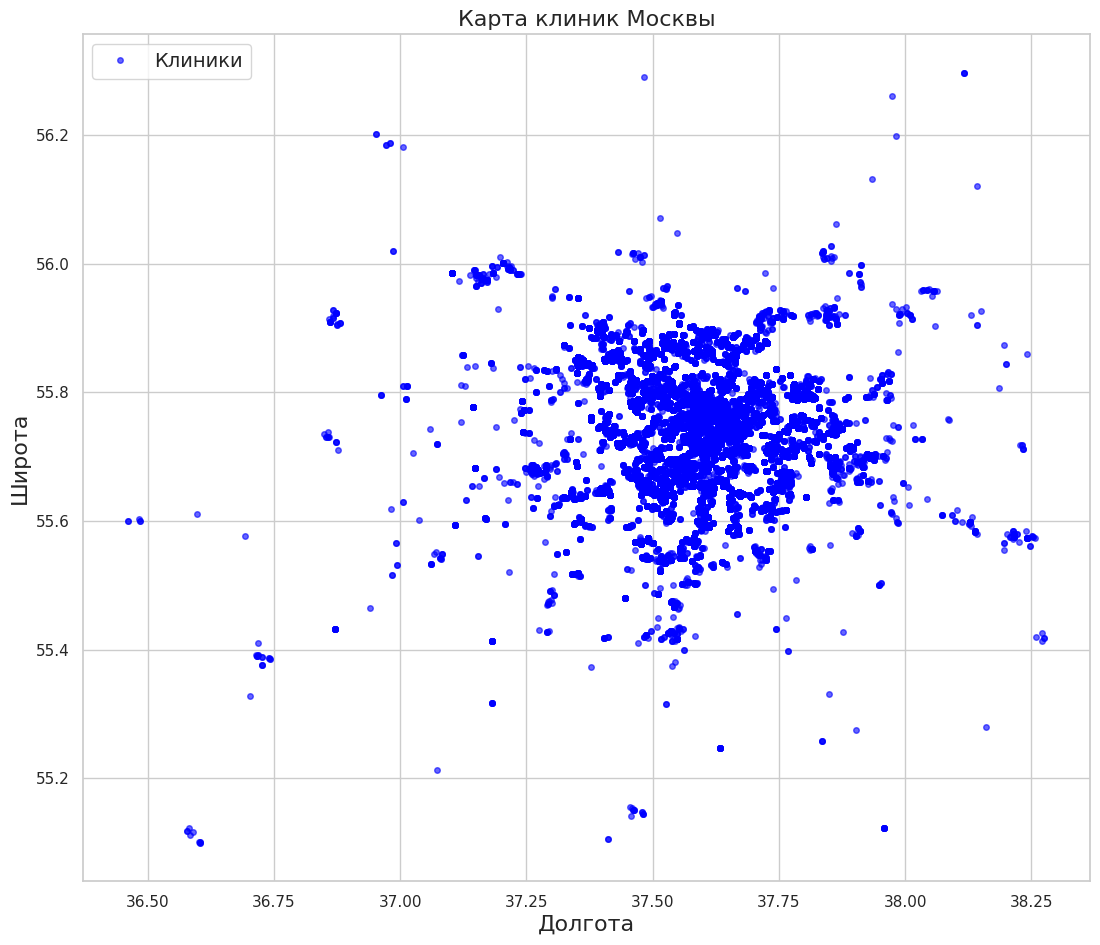

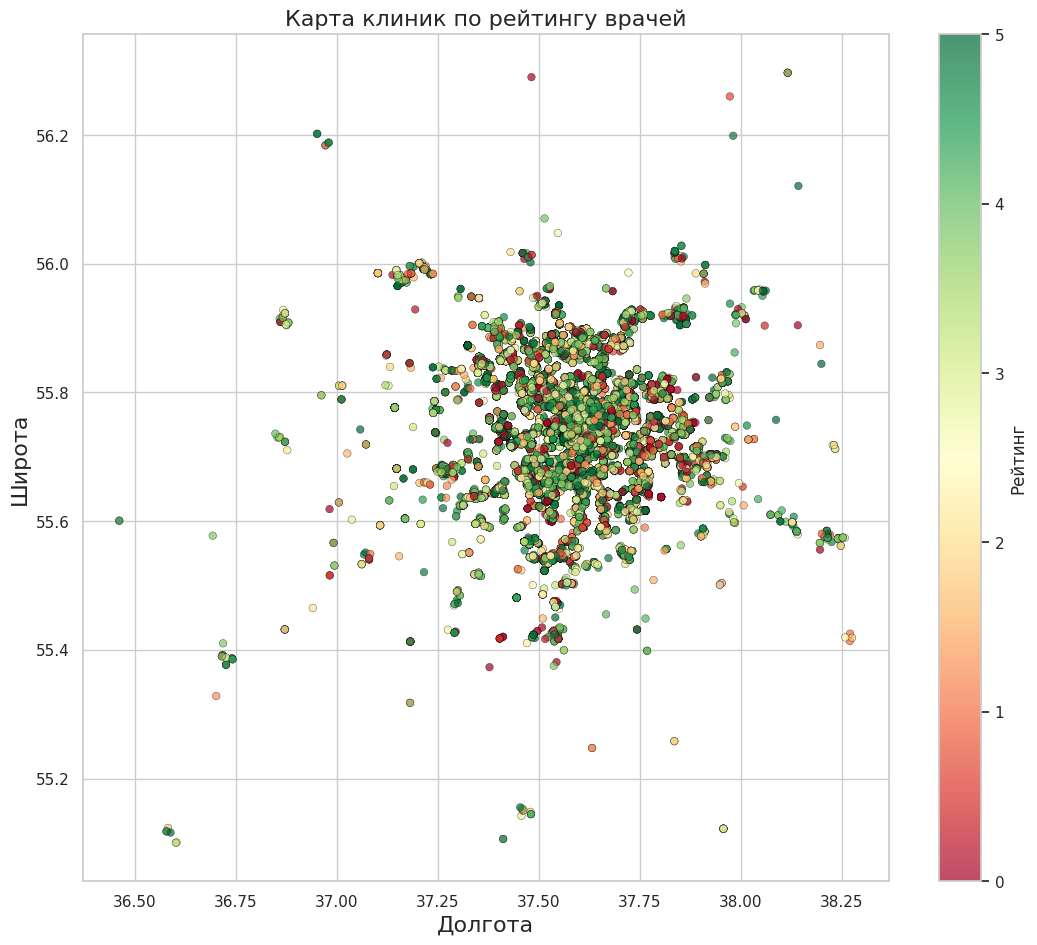

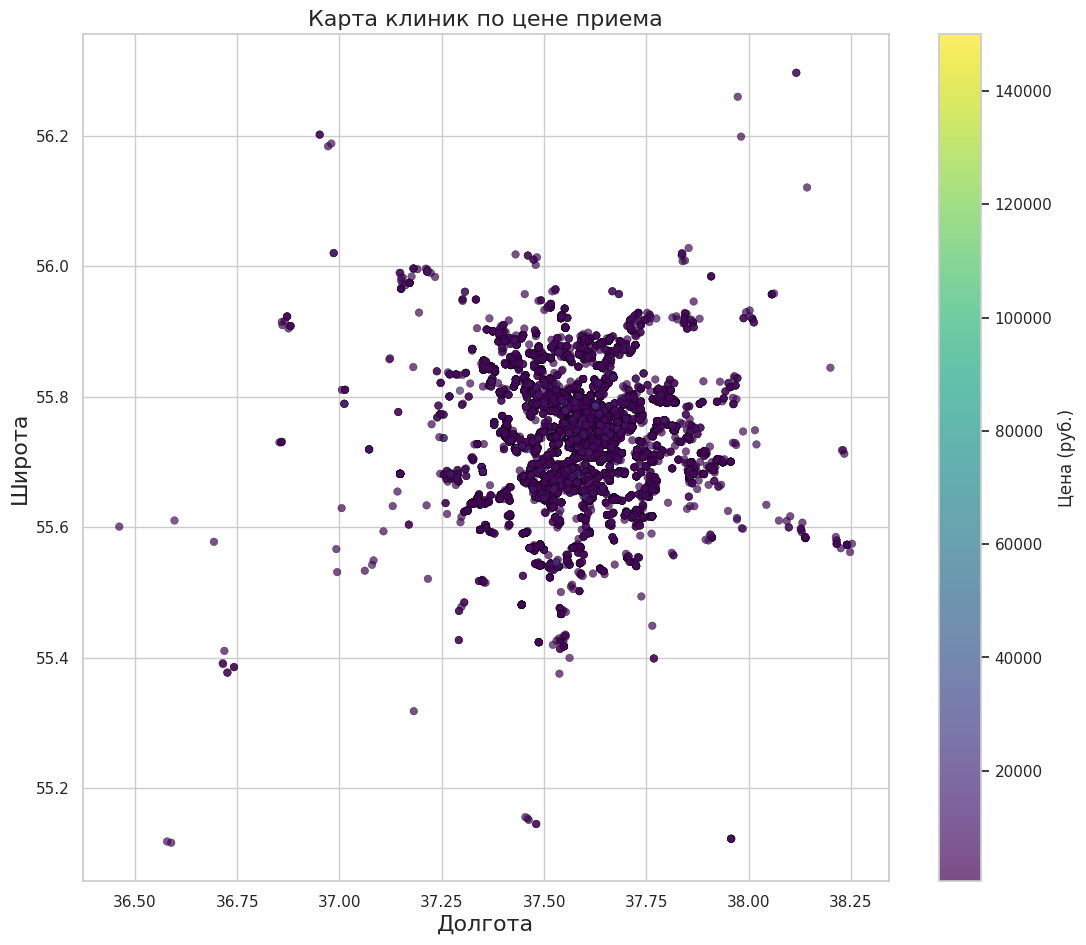

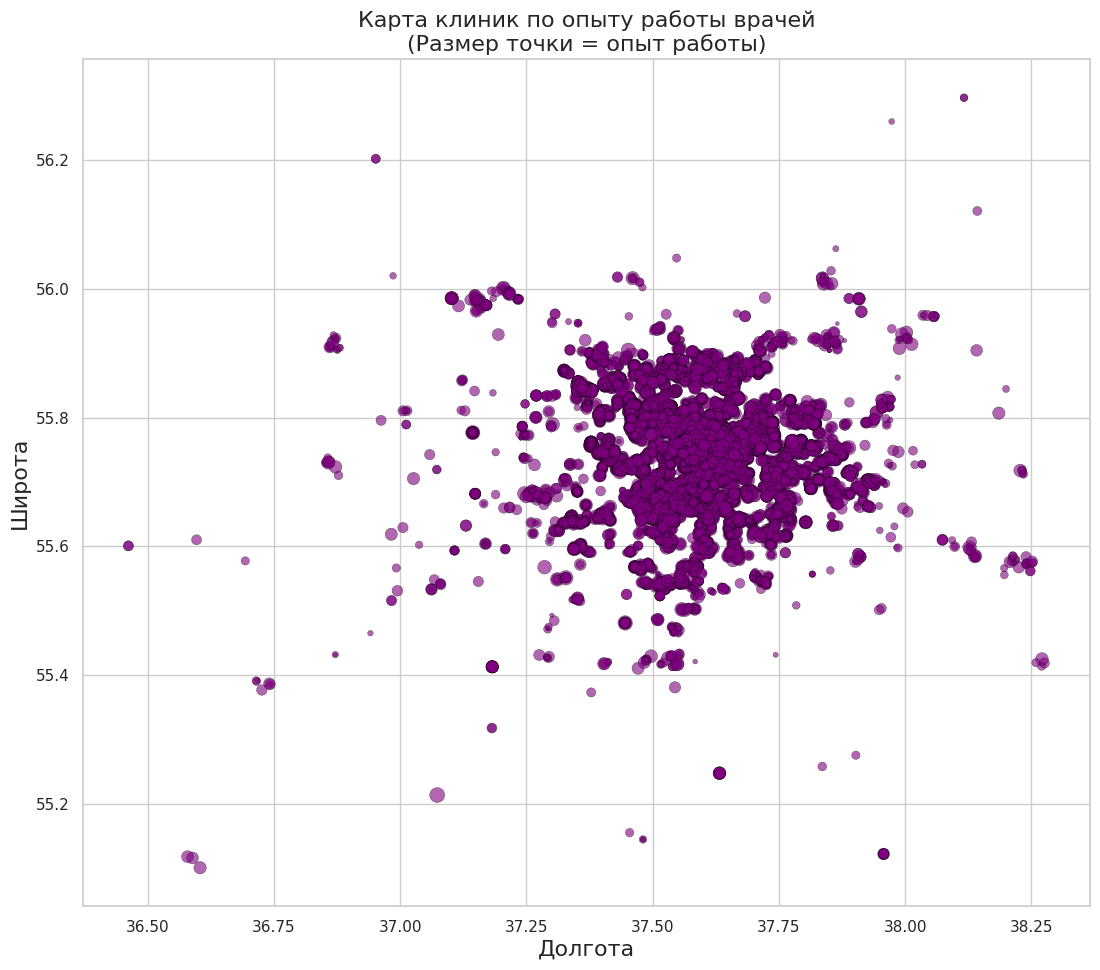

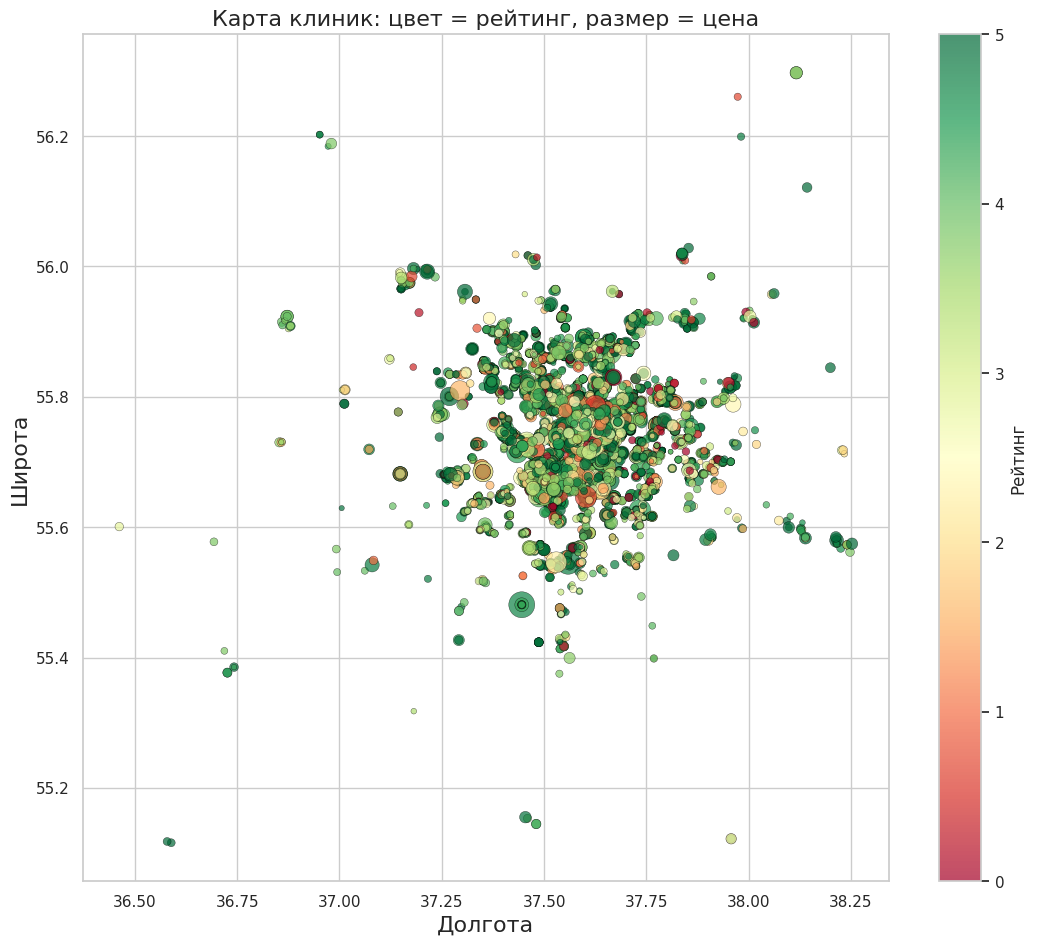

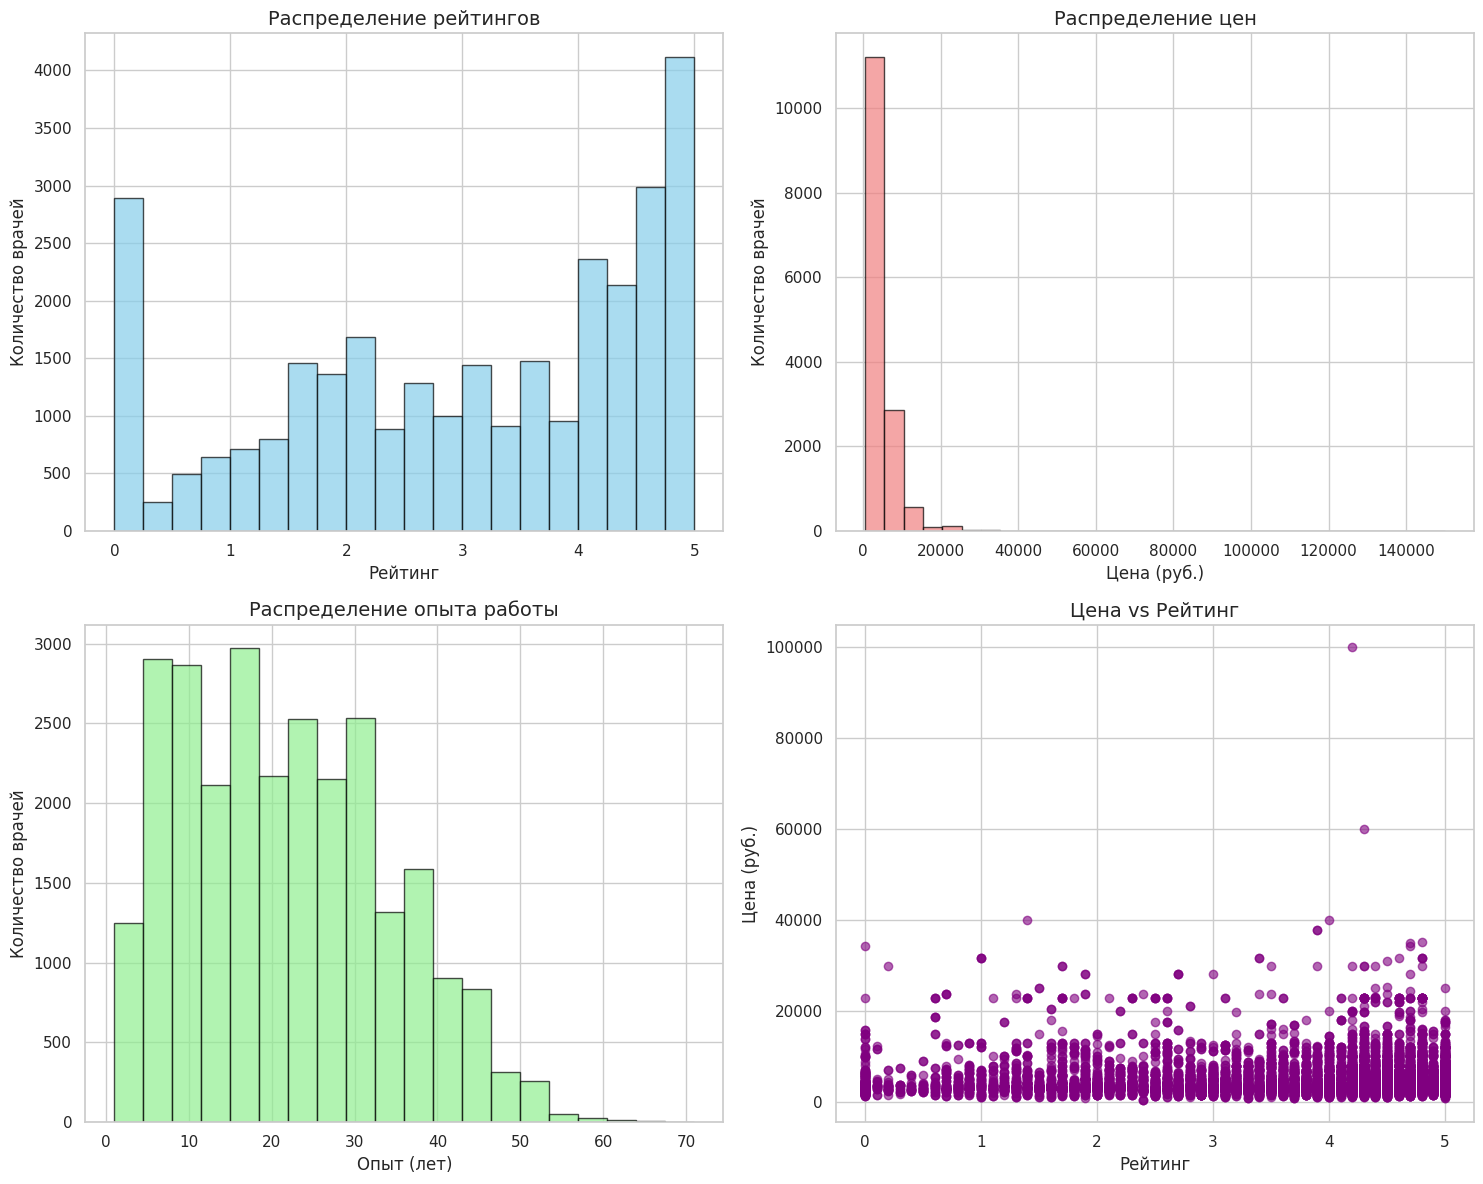


=== ОСНОВНАЯ СТАТИСТИКА ===
Всего врачей с координатами: 39669
Средний рейтинг: 2.98
Медианная цена: 3600 руб.
Средний опыт работы: 21.5 лет


In [51]:




# 3. Карта с цветовым кодированием по цене
plt.figure(figsize=(13, 11))

# Создаем scatter plot с цветом по цене
scatter = plt.scatter(df_clean['longitude'], df_clean['latitude'],
                     c=df_clean['price_final'], cmap='viridis',
                     alpha=0.7, s=30, edgecolors='black', linewidth=0.3)

plt.xlabel('Долгота', fontsize=16)
plt.ylabel('Широта', fontsize=16)
plt.title('Карта клиник по цене приема', fontsize=16)
plt.colorbar(scatter, label='Цена (руб.)')
plt.show()

# 4. Карта с размером точек по опыту работы
plt.figure(figsize=(13, 11))

# Создаем scatter plot с размером по опыту работы
scatter = plt.scatter(df_clean['longitude'], df_clean['latitude'],
                     s=df_clean['experience']*2,  # Увеличиваем размер для наглядности
                     alpha=0.6, color='purple', edgecolors='black', linewidth=0.3)

plt.xlabel('Долгота', fontsize=16)
plt.ylabel('Широта', fontsize=16)
plt.title('Карта клиник по опыту работы врачей\n(Размер точки = опыт работы)', fontsize=16)
plt.show()

# 5. Комбинированная карта: цвет по рейтингу, размер по цене
plt.figure(figsize=(13, 11))

# Нормализуем размер точек по цене (чтобы не было слишком больших/маленьких)
size = df_clean['price_final'] / 100  # Масштабируем для разумного размера точек

scatter = plt.scatter(df_clean['longitude'], df_clean['latitude'],
                     c=df_clean['rating'], cmap='RdYlGn',
                     s=size, alpha=0.7, edgecolors='black', linewidth=0.3)

plt.xlabel('Долгота', fontsize=16)
plt.ylabel('Широта', fontsize=16)
plt.title('Карта клиник: цвет = рейтинг, размер = цена', fontsize=16)
plt.colorbar(scatter, label='Рейтинг')
plt.show()

# Дополнительно: статистические графики в том же стиле
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Распределение рейтингов
axes[0,0].hist(df_clean['rating'].dropna(), bins=20, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].set_title('Распределение рейтингов', fontsize=14)
axes[0,0].set_xlabel('Рейтинг')
axes[0,0].set_ylabel('Количество врачей')

# Распределение цен
axes[0,1].hist(df_clean['price_final'].dropna(), bins=30, alpha=0.7, color='lightcoral', edgecolor='black')
axes[0,1].set_title('Распределение цен', fontsize=14)
axes[0,1].set_xlabel('Цена (руб.)')
axes[0,1].set_ylabel('Количество врачей')

# Распределение опыта работы
axes[1,0].hist(df_clean['experience'].dropna(), bins=20, alpha=0.7, color='lightgreen', edgecolor='black')
axes[1,0].set_title('Распределение опыта работы', fontsize=14)
axes[1,0].set_xlabel('Опыт (лет)')
axes[1,0].set_ylabel('Количество врачей')
# Зависимость цены от рейтинга
valid_data = df_clean.dropna(subset=['rating', 'price_final'])
axes[1,1].scatter(valid_data['rating'], valid_data['price_final'], alpha=0.6, color='purple')
axes[1,1].set_title('Цена vs Рейтинг', fontsize=14)
axes[1,1].set_xlabel('Рейтинг')
axes[1,1].set_ylabel('Цена (руб.)')

plt.tight_layout()
plt.show()

# Вывод основной статистики
print("\n=== ОСНОВНАЯ СТАТИСТИКА ===")
print(f"Всего врачей с координатами: {len(df_clean)}")
print(f"Средний рейтинг: {df_clean['rating'].mean():.2f}")
print(f"Медианная цена: {df_clean['price_final'].median():.0f} руб.")
print(f"Средний опыт работы: {df_clean['experience'].mean():.1f} лет")